In [50]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from fetch_data import TitanicData, ModelInput
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

## Fetch Data

In [8]:
t = TitanicData()
t.fetch_data()

## Feature Engineering: First Impressions
New columns representing:
- Fill null Age values with average by Sex, Embarked
- Convert Pclass, Sex, SibSp, and Parch to categorical (get_dummies)
- CabinFlag: 1 or 0
- Cabin Section and make categorical
- LastName
- CabinOccupants
- Scale (after train-test-split)
- NLP on Name: CountVectorizer and/or TFIDF


In [9]:
t.set()

In [10]:
t.data.tail()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,LastName,CabinFlag,Pclass_2,...,Parch_6,Embarked_Q,Embarked_S,Section_B,Section_C,Section_D,Section_E,Section_F,Section_G,Section_T
886,887,0,"Montvila, Rev. Juozas",27.000000,211536,13.00,NaN,Montvila,0,1,...,0,0,1,0,0,0,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",19.000000,112053,30.00,B42,Graham,1,0,...,0,0,1,1,0,0,0,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",27.771505,W./C. 6607,23.45,NaN,Johnston,0,0,...,0,0,1,0,0,0,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",26.000000,111369,30.00,C148,Behr,1,0,...,0,0,0,0,1,0,0,0,0,0
890,891,0,"Dooley, Mr. Patrick",32.000000,370376,7.75,NaN,Dooley,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
t.data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin',
       'LastName', 'CabinFlag', 'Pclass_2', 'Pclass_3', 'Sex_male', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_Q',
       'Embarked_S', 'Section_B', 'Section_C', 'Section_D', 'Section_E',
       'Section_F', 'Section_G', 'Section_T'],
      dtype='object')

## Build Input for Model
Set the features to be used for training the model. Then do a Train-Test Split and Scale Numerical Data.

In [44]:
mi = ModelInput(t.data, t.test_data)

mi.set_features()
mi.train_test_split(test_size=0.2)
mi.scale()

In [38]:
mi.X_train.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Parch_6,Embarked_Q,Embarked_S,Section_B,Section_C,Section_D,Section_E,Section_F,Section_G,Section_T
329,0.195778,0.113168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
749,0.384267,0.015127,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.566474,0.014102,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0.258608,0.015094,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.283740,0.123667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Grid Search & Random Forest Classifier
Use GridSearchCV to iteratively train several Random Forest Classifers, find the best parameters, and make predictions.

In [25]:
params = {'n_estimators': [100, 300, 1000, 3000], 'max_depth': [5, 7, 9, 10]}

rf = RandomForestClassifier(criterion='gini', 
                            n_jobs=2, 
                            random_state=123)

gs = GridSearchCV(rf, params, verbose=1)
gs.fit(mi.X_train, mi.y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.1min finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=2, random_state=123),
             param_grid={'max_depth': [5, 7, 9, 10],
                         'n_estimators': [100, 300, 1000, 3000]},
             verbose=1)

In [26]:
gs.cv_results_

{'mean_fit_time': array([0.6014586 , 0.61462159, 1.72114244, 4.78450394, 0.25017018,
        0.59745121, 1.88183079, 5.28959265, 0.26077604, 0.64882364,
        1.91333971, 5.83429379, 0.24010501, 0.6177    , 1.91179028,
        5.25643764]),
 'std_fit_time': array([0.71947932, 0.01562823, 0.03164373, 0.03305965, 0.0170905 ,
        0.02721123, 0.10062217, 0.12885622, 0.01659891, 0.02494716,
        0.09059245, 0.28927073, 0.01032589, 0.01996818, 0.03747854,
        0.12833975]),
 'mean_score_time': array([0.1160223 , 0.10491629, 0.30589323, 0.70831079, 0.10480514,
        0.10474887, 0.30686097, 0.72819614, 0.10520096, 0.10488396,
        0.34782143, 0.70941358, 0.1053679 , 0.10484395, 0.30636644,
        0.70898376]),
 'std_score_time': array([0.02218742, 0.00019105, 0.0002496 , 0.00082966, 0.0002083 ,
        0.00027817, 0.00073217, 0.03983993, 0.00043609, 0.00037707,
        0.08257115, 0.001078  , 0.00080763, 0.00010904, 0.00050434,
        0.00074897]),
 'param_max_depth': masked

Optimized results from GridSearchCV.cv_results_ can be obtained by doing the following:

In [27]:
best_idx = gs.cv_results_['rank_test_score'].argmin()
best_params = gs.cv_results_['params'][best_idx]
print(f'Best Params: {best_params}')

Best Params: {'max_depth': 9, 'n_estimators': 1000}


## Apply Parameters to Classifier
The max_depth of 9 as an optimized parameter suggests that we may be experiencing some overfitting. Modifying this to reduce the overfitting, indeed, improved the score by 0.12.

In [91]:
# rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
#                             max_depth=best_params['max_depth'], 
#                             criterion='gini', 
#                             n_jobs=2, 
#                             random_state=123)

rf = RandomForestClassifier(n_estimators=1000, 
                            max_depth=3, 
                            criterion='gini', 
                            n_jobs=2, 
                            random_state=123)


In [92]:
rf.fit(mi.X_train, mi.y_train)
y_pred = rf.predict(mi.X_test)

In [93]:
acc = accuracy_score(mi.y_test, y_pred)
f1 = f1_score(mi.y_test, y_pred)
cm = confusion_matrix(mi.y_test, y_pred)

print(f'Accuracy: \t{acc}')
print(f'F1: \t\t{f1}')
print(f'Confusion Matrix: \n{cm}')

Accuracy: 	0.8324022346368715
F1: 		0.7413793103448276
Confusion Matrix: 
[[106   8]
 [ 22  43]]


## Feature Importance

Text(0.5, 0, 'Average Contribution to Information Gain')

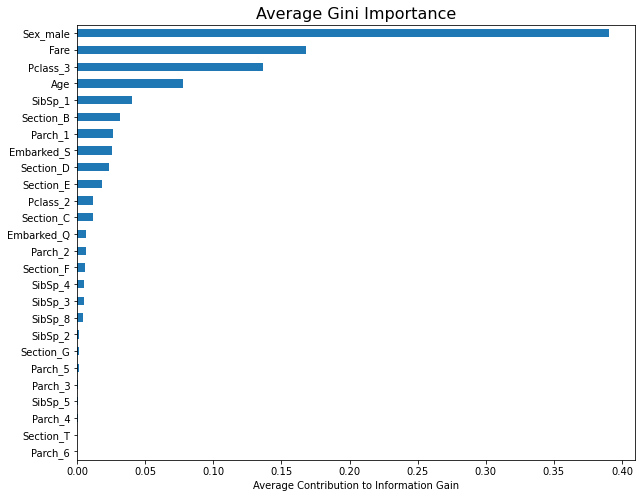

In [94]:
feat_scores = pd.Series(rf.feature_importances_, 
                        index=mi.X_train.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', figsize=(10, 8))
ax.set_title('Average Gini Importance', fontsize=16)
ax.set_xlabel('Average Contribution to Information Gain')

# Unseen Test Data
Create predictions on unseen test data for submission.

In [95]:
mi.hidden_data.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Parch_6,Embarked_Q,Embarked_S,Section_B,Section_C,Section_D,Section_E,Section_F,Section_G,Section_T
0,0.428248,0.015282,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.585323,0.013663,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.773813,0.018909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.334004,0.016908,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.271174,0.023984,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
y_pred_submit = rf.predict(mi.hidden_data)

In [97]:
submission = pd.DataFrame(data={
    'PassengerId': t.test_data.loc[:, 'PassengerId'], 
    'Survived': y_pred_submit})


In [98]:
submission.to_csv('../data/rf_output_v4.csv', index=False)

In [99]:
!kaggle competitions submit -c titanic -f ../data/rf_output_v4.csv -m "random forest classifier with optimized params"

100%|██████████████████████████████████████| 2.77k/2.77k [00:02<00:00, 1.15kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster